## Install

In [1]:
#!pip install syft

In [2]:
# rerun this to reset
!rm /var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

In [3]:
from syft import Worker
import syft as sy
from syft.core.node.new.util import autocache, PANDAS_DATA
worker = Worker.named("test-domain-1", processes=1, reset=False)
root_domain_client = worker.root_client

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/PySyft


SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.Data

## Load data

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [5]:
from datetime import timedelta
import random
from dateutil.parser import parse
from pandas._libs.tslibs.timestamps import Timestamp

<AxesSubplot: xlabel='Date/Time'>

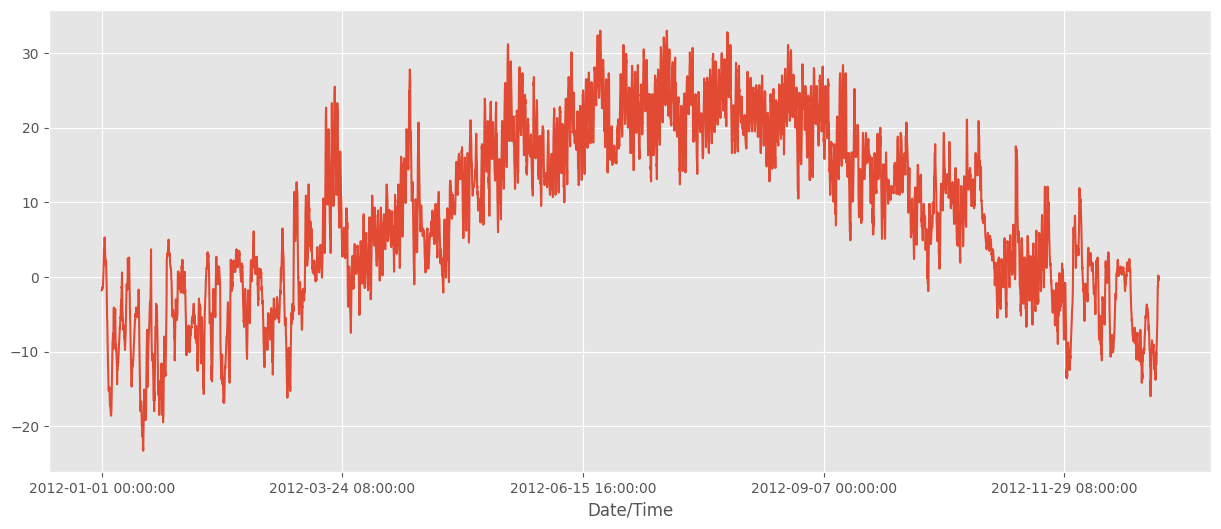

In [6]:
weather_2012_final = pd.read_csv(autocache(f"{PANDAS_DATA}/weather_2012.csv"), index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## Create mock data

Instead, we upload our dataset per month as a starting point

In [7]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit"

In [8]:
weather_types = set(weather_2012_final.Weather.to_list())

In [9]:
def get_mock_date(i):
    return str(parse('Jun 1 2010') + timedelta(days=i))

def get_mock_row(i):
    res = dict()
    for k, function in mock_functions.items():
        res[k] = function()
    return res
    

In [10]:
mock_functions = {
    "Temp (°C)": lambda: random.uniform(-10, 40),
    "Dew Point Temp (C)": lambda: random.uniform(-10, 10),
    "Rel Hum (%)": lambda: random.randint(50, 100),
    "Wind Spd (km/h)": lambda: random.randint(1, 30),
    'Visibility (km)': lambda: random.uniform(0.5, 40),
    'Stn Press (kPa)': lambda: random.uniform(50, 100),
    'Weather': lambda: random.choice(list(weather_types))
}

In [11]:
assets = []
for month in range(1, 13):
    url = url_template.format(month=month, year=2012)
    weather = pd.read_csv(url, parse_dates=True, index_col='Date/Time (LST)')
    mock = pd.DataFrame(index=[Timestamp(get_mock_date(i)) for i in range(len(weather))],
                    data=[get_mock_row(i) for i in range(len(weather))],
                    columns=weather.columns)
    
    assets += [sy.Asset(name=f"weather{month}", data=weather, mock=mock, mock_is_real=False)]

Upload the data

In [12]:
dataset = sy.Dataset(name="test", asset_list=assets)
root_domain_client.upload_dataset(dataset)



  0%|                                                                                                                | 0/12 [00:00<?, ?it/s]

Uploading: weather1



  8%|████████▋                                                                                               | 1/12 [00:00<00:02,  3.81it/s]

Uploading: weather2



 17%|█████████████████▎                                                                                      | 2/12 [00:00<00:02,  4.43it/s]

Uploading: weather3



 25%|██████████████████████████                                                                              | 3/12 [00:00<00:01,  4.79it/s]

Uploading: weather4



 33%|██████████████████████████████████▋                                                                     | 4/12 [00:00<00:01,  4.97it/s]

Uploading: weather5



 42%|███████████████████████████████████████████▎                                                            | 5/12 [00:01<00:01,  5.06it/s]

Uploading: weather6



 50%|████████████████████████████████████████████████████                                                    | 6/12 [00:01<00:01,  5.13it/s]

Uploading: weather7



 58%|████████████████████████████████████████████████████████████▋                                           | 7/12 [00:01<00:00,  5.17it/s]

Uploading: weather8



 67%|█████████████████████████████████████████████████████████████████████▎                                  | 8/12 [00:01<00:00,  5.18it/s]

Uploading: weather9



 75%|██████████████████████████████████████████████████████████████████████████████                          | 9/12 [00:01<00:00,  5.19it/s]

Uploading: weather10



 83%|█████████████████████████████████████████████████████████████████████████████████████▊                 | 10/12 [00:01<00:00,  5.21it/s]

Uploading: weather11



 92%|██████████████████████████████████████████████████████████████████████████████████████████████▍        | 11/12 [00:02<00:00,  5.24it/s]

Uploading: weather12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.06it/s]


<class 'syft.core.node.new.response.SyftSuccess'>: Dataset Added

In [13]:
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,00:00,-10.8,NaN,...,NaN,25.0,NaN,103.26,NaN,NaN,NaN,-16.0,NaN,Clear
2012-12-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,01:00,-11.0,NaN,...,NaN,25.0,NaN,103.25,NaN,NaN,NaN,-17.0,NaN,Mainly Clear
2012-12-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,02:00,-11.1,NaN,...,NaN,25.0,NaN,103.21,NaN,NaN,NaN,-19.0,NaN,Mainly Clear
2012-12-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,03:00,-12.5,NaN,...,NaN,25.0,NaN,103.27,NaN,NaN,NaN,-20.0,NaN,Mainly Clear
2012-12-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,12,1,04:00,-11.8,NaN,...,NaN,25.0,NaN,103.22,NaN,NaN,NaN,-19.0,NaN,Mostly Cloudy


## Create user account

In [14]:
user = root_domain_client.register(name="Jane Doe", email="jane@caltech.edu",
                            password="abc123", institution="Caltech", website="https://www.caltech.edu/")

In [15]:
# todo: give user data scientist role

In [16]:
guest_domain_client = worker.guest_client

In [17]:
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")